Step 2.1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

# Set paths
PROJECT_PATH = '/content/drive/MyDrive/UFC_ML_Project'
DATA_PROCESSED = f'{PROJECT_PATH}/data/processed'
VIZ_PATH = f'{PROJECT_PATH}/visualizations'

# Load the ELO-enhanced data
data = pd.read_csv(f'{DATA_PROCESSED}/elo_ratings.csv')
print(f"✅ Loaded {len(data)} fights with ELO ratings")

Mounted at /content/drive
✅ Loaded 4768 fights with ELO ratings


Step 2.2

🏋️ Calculating physical attribute differences...
✅ Physical differences calculated!

📊 Summary Statistics:
   Height Diff - Mean: -0.13 cm, Std: 6.42 cm
   Reach Diff - Mean: -0.02 cm, Std: 8.10 cm
   Age Diff - Mean: 0.55 years, Std: 5.16 years
✅ Saved physical differences visualization to /content/drive/MyDrive/UFC_ML_Project/visualizations/physical_differences.png


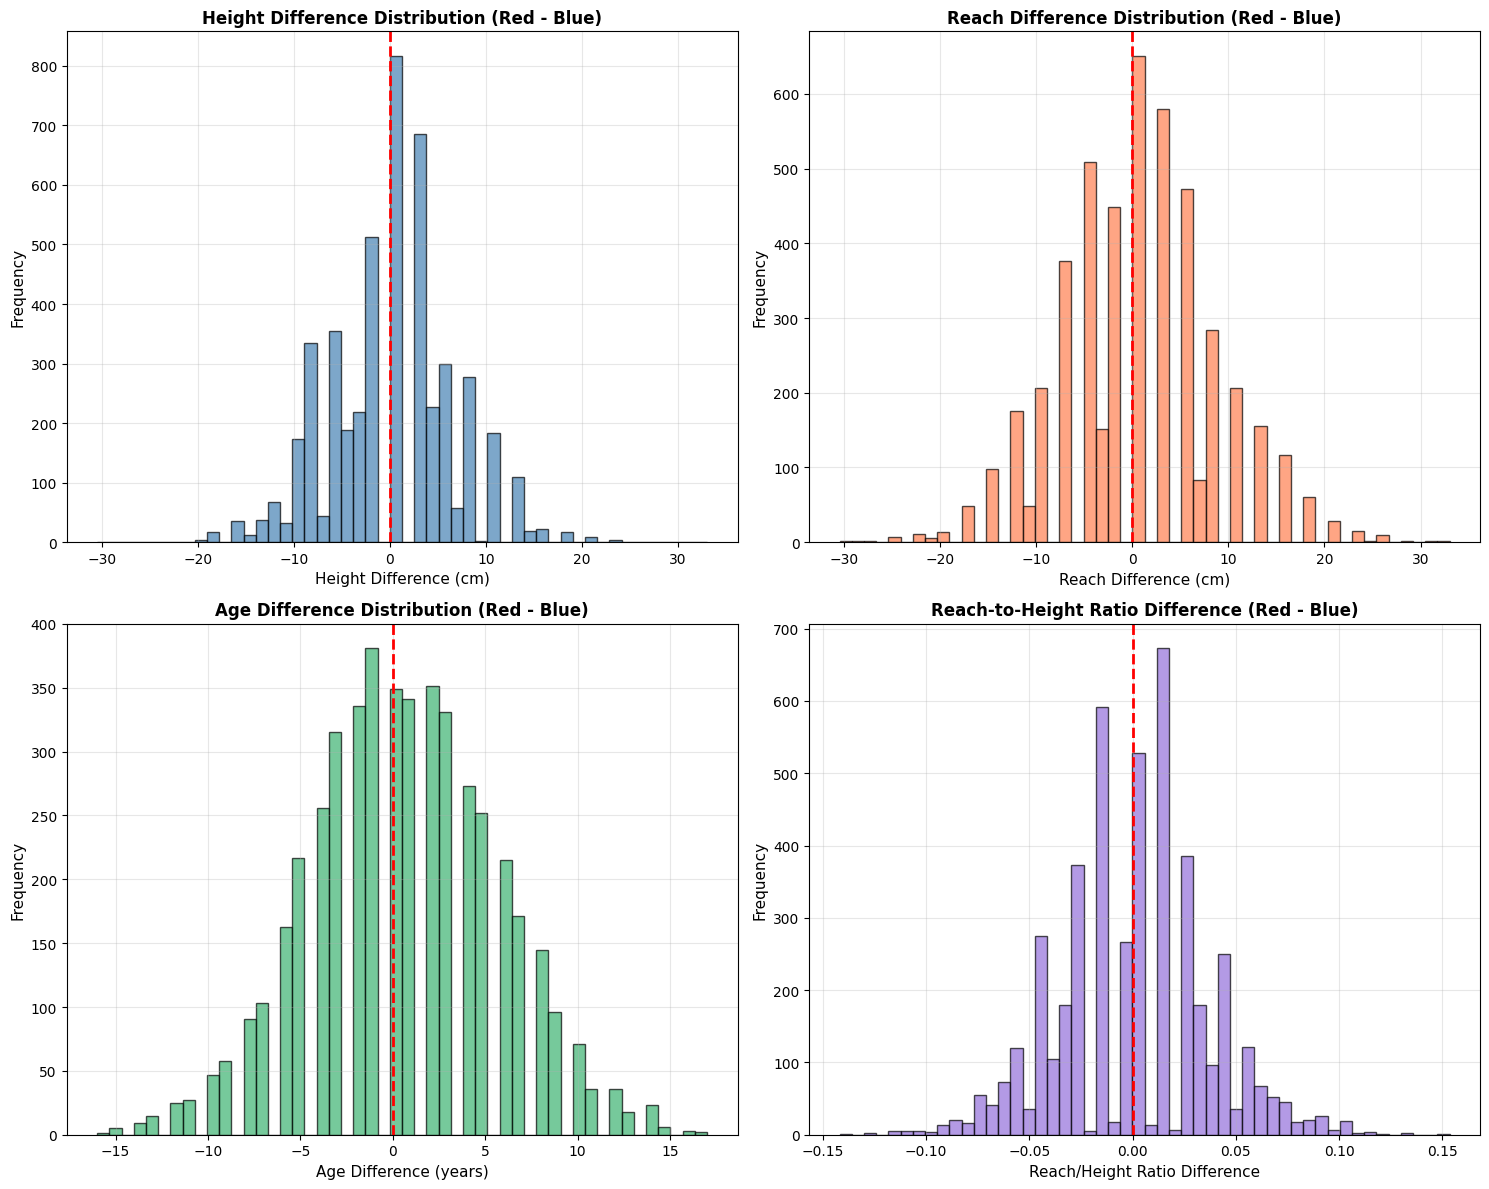

In [2]:
print("🏋️ Calculating physical attribute differences...")

# Height difference (cm)
data['height_diff'] = data['R_Height_cms'] - data['B_Height_cms']

# Reach difference (cm)
data['reach_diff'] = data['R_Reach_cms'] - data['B_Reach_cms']

# Age difference (years)
data['age_diff'] = data['R_age'] - data['B_age']

# Weight difference (lbs) - should be minimal within weight class
data['weight_diff'] = data['R_Weight_lbs'] - data['B_Weight_lbs']

# Create reach advantage per height ratio
data['R_reach_height_ratio'] = data['R_Reach_cms'] / data['R_Height_cms']
data['B_reach_height_ratio'] = data['B_Reach_cms'] / data['B_Height_cms']
data['reach_height_ratio_diff'] = data['R_reach_height_ratio'] - data['B_reach_height_ratio']

print("✅ Physical differences calculated!")
print("\n📊 Summary Statistics:")
print(f"   Height Diff - Mean: {data['height_diff'].mean():.2f} cm, Std: {data['height_diff'].std():.2f} cm")
print(f"   Reach Diff - Mean: {data['reach_diff'].mean():.2f} cm, Std: {data['reach_diff'].std():.2f} cm")
print(f"   Age Diff - Mean: {data['age_diff'].mean():.2f} years, Std: {data['age_diff'].std():.2f} years")

# Visualize physical differences
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].hist(data['height_diff'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].axvline(0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Height Difference (cm)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Height Difference Distribution (Red - Blue)', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(data['reach_diff'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0, 1].axvline(0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Reach Difference (cm)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Reach Difference Distribution (Red - Blue)', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(data['age_diff'], bins=50, edgecolor='black', alpha=0.7, color='mediumseagreen')
axes[1, 0].axvline(0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Age Difference (years)', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Age Difference Distribution (Red - Blue)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(data['reach_height_ratio_diff'], bins=50, edgecolor='black', alpha=0.7, color='mediumpurple')
axes[1, 1].axvline(0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Reach/Height Ratio Difference', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title('Reach-to-Height Ratio Difference (Red - Blue)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{VIZ_PATH}/physical_differences.png', dpi=300, bbox_inches='tight')
print(f"✅ Saved physical differences visualization to {VIZ_PATH}/physical_differences.png")
plt.show()

Step 2.3

In [3]:
print("📈 Calculating performance metric differences (using pre-calculated averages)...")

# Your data already has R_avg_* and B_avg_* columns
# Just calculate differences directly!

performance_metrics = {
    'KD': 'Knockdowns',
    'SIG_STR_pct': 'Significant Strike Percentage',
    'SIG_STR_landed': 'Significant Strikes Landed',
    'TD_pct': 'Takedown Percentage',
    'TD_landed': 'Takedowns Landed',
    'SUB_ATT': 'Submission Attempts',
    'CTRL_time(seconds)': 'Control Time'
}

# Calculate differences using the PRE-CALCULATED averages
diff_count = 0
for metric, description in performance_metrics.items():
    r_col = f'R_avg_{metric}'
    b_col = f'B_avg_{metric}'
    diff_col = f'diff_{metric}'

    if r_col in data.columns and b_col in data.columns:
        data[diff_col] = data[r_col] - data[b_col]
        print(f"   ✓ {diff_col}: {description}")
        diff_count += 1
    else:
        print(f"   ✗ {diff_col}: Columns not found (R={r_col in data.columns}, B={b_col in data.columns})")

print(f"\n✅ Calculated {diff_count} performance difference features!")

# Verify they have real values
print("\n📊 Sample values:")
sample_cols = [f'diff_{m}' for m in ['KD', 'SIG_STR_pct', 'TD_pct', 'SUB_ATT'] if f'diff_{m}' in data.columns]
if sample_cols:
    print(data[sample_cols].describe())
else:
    print("⚠️ No diff columns found!")

📈 Calculating performance metric differences (using pre-calculated averages)...
   ✓ diff_KD: Knockdowns
   ✓ diff_SIG_STR_pct: Significant Strike Percentage
   ✓ diff_SIG_STR_landed: Significant Strikes Landed
   ✓ diff_TD_pct: Takedown Percentage
   ✓ diff_TD_landed: Takedowns Landed
   ✓ diff_SUB_ATT: Submission Attempts
   ✓ diff_CTRL_time(seconds): Control Time

✅ Calculated 7 performance difference features!

📊 Sample values:
           diff_KD  diff_SIG_STR_pct  diff_TD_pct  diff_SUB_ATT
count  4768.000000       4768.000000  4768.000000   4768.000000
mean      0.024250          0.055391     0.032890      0.030597
std       0.457507          0.235388     0.341165      0.796324
min      -3.000000         -0.800000    -1.000000     -6.250000
25%      -0.062500         -0.082573    -0.150887     -0.156250
50%       0.000000          0.011875     0.000000      0.000000
75%       0.187500          0.162705     0.249375      0.312500
max       2.859375          1.000000     1.000000   

Step 2.4

🎯 Calculating ELO-based features...
✅ ELO features calculated!
   Mean ELO diff: 8.24
   Mean ELO (weight class) diff: 7.49

📊 Analyzing ELO predictive power...


/tmp/ipython-input-3732339037.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  win_rate_by_elo = data.groupby(elo_bins)['red_won'].mean()


✅ Saved ELO predictive power chart to /content/drive/MyDrive/UFC_ML_Project/visualizations/elo_predictive_power.png


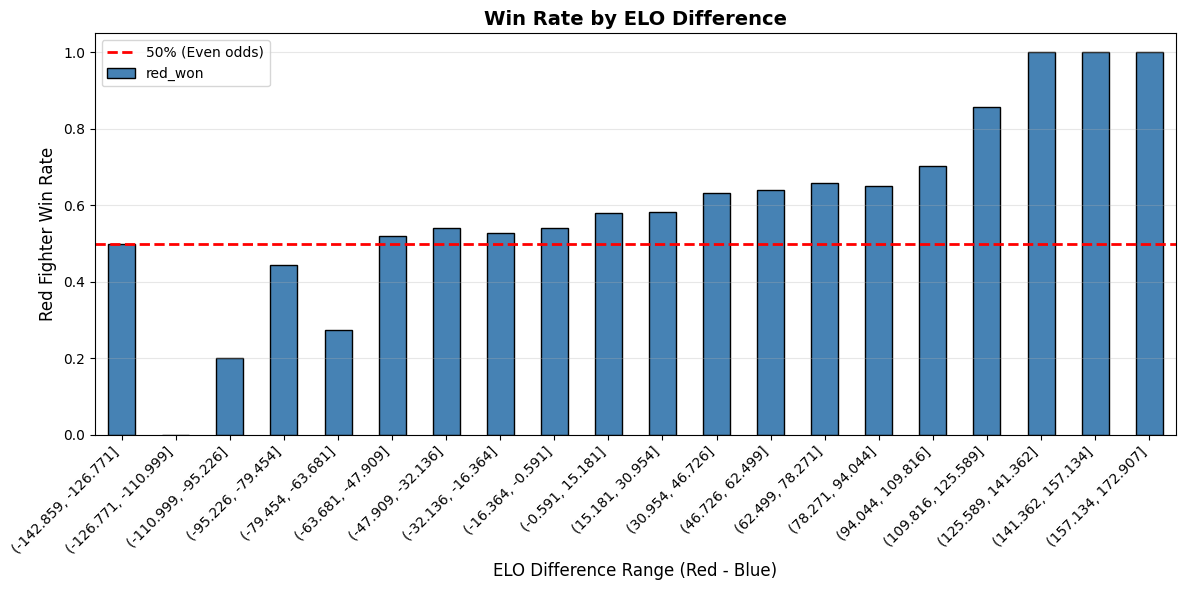

In [4]:
print("🎯 Calculating ELO-based features...")

# ELO differences (main predictive feature)
data['elo_diff'] = data['R_elo_before'] - data['B_elo_before']
data['elo_wc_diff'] = data['R_elo_wc_before'] - data['B_elo_wc_before']

# Average ELO (fight quality indicator)
data['elo_avg'] = (data['R_elo_before'] + data['B_elo_before']) / 2
data['elo_wc_avg'] = (data['R_elo_wc_before'] + data['B_elo_wc_before']) / 2

# ELO momentum (recent performance indicator)
data['R_elo_momentum'] = data['R_elo_after'] - data['R_elo_before']
data['B_elo_momentum'] = data['B_elo_after'] - data['B_elo_before']

print("✅ ELO features calculated!")
print(f"   Mean ELO diff: {data['elo_diff'].mean():.2f}")
print(f"   Mean ELO (weight class) diff: {data['elo_wc_diff'].mean():.2f}")

# Analyze ELO difference vs outcome
print("\n📊 Analyzing ELO predictive power...")

# Create outcome numeric (1 if Red wins, 0 if Blue wins)
data['red_won'] = (data['Winner'] == 'Red').astype(int)

# Group by ELO difference ranges
elo_bins = pd.cut(data['elo_diff'], bins=20)
win_rate_by_elo = data.groupby(elo_bins)['red_won'].mean()

plt.figure(figsize=(12, 6))
win_rate_by_elo.plot(kind='bar', color='steelblue', edgecolor='black')
plt.axhline(0.5, color='red', linestyle='--', linewidth=2, label='50% (Even odds)')
plt.xlabel('ELO Difference Range (Red - Blue)', fontsize=12)
plt.ylabel('Red Fighter Win Rate', fontsize=12)
plt.title('Win Rate by ELO Difference', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig(f'{VIZ_PATH}/elo_predictive_power.png', dpi=300, bbox_inches='tight')
print(f"✅ Saved ELO predictive power chart to {VIZ_PATH}/elo_predictive_power.png")
plt.show()

Step 2.5

In [5]:
print("🏆 Calculating experience and streak features...")

# Experience differences
data['diff_total_rounds'] = data['R_total_rounds_fought'] - data['B_total_rounds_fought']
data['diff_total_time'] = data['R_total_time_fought(seconds)'] - data['B_total_time_fought(seconds)']
# data['diff_total_fights'] = (data['R_wins'] + data['R_losses']) - (data['B_wins'] + data['B_losses'])
data['diff_title_bouts'] = data['R_total_title_bouts'] - data['B_total_title_bouts']

# Win/Loss record differences
data['diff_wins'] = data['R_wins'] - data['B_wins']
data['diff_losses'] = data['R_losses'] - data['B_losses']

# Win rate
data['R_win_rate'] = data['R_wins'] / (data['R_wins'] + data['R_losses'] + 0.1)  # +0.1 to avoid division by zero
data['B_win_rate'] = data['B_wins'] / (data['B_wins'] + data['B_losses'] + 0.1)
data['diff_win_rate'] = data['R_win_rate'] - data['B_win_rate']

# Streak features
data['diff_win_streak'] = data['R_current_win_streak'] - data['B_current_win_streak']
data['diff_lose_streak'] = data['R_current_lose_streak'] - data['B_current_lose_streak']
data['diff_longest_win_streak'] = data['R_longest_win_streak'] - data['B_longest_win_streak']

# Finishing ability (KO/TKO + Submission rate)
data['R_finish_rate'] = (data['R_win_by_KO/TKO'] + data['R_win_by_Submission']) / (data['R_wins'] + 0.1)
data['B_finish_rate'] = (data['B_win_by_KO/TKO'] + data['B_win_by_Submission']) / (data['B_wins'] + 0.1)
data['diff_finish_rate'] = data['R_finish_rate'] - data['B_finish_rate']

# Decision win rate (indicates going the distance ability)
data['R_decision_rate'] = (data['R_win_by_Decision_Unanimous'] +
                            data['R_win_by_Decision_Split'] +
                            data['R_win_by_Decision_Majority']) / (data['R_wins'] + 0.1)
data['B_decision_rate'] = (data['B_win_by_Decision_Unanimous'] +
                            data['B_win_by_Decision_Split'] +
                            data['B_win_by_Decision_Majority']) / (data['B_wins'] + 0.1)
data['diff_decision_rate'] = data['R_decision_rate'] - data['B_decision_rate']

print("✅ Experience and streak features calculated!")
print(f"   Total new features: {len([col for col in data.columns if 'diff_' in col or '_rate' in col])}")

🏆 Calculating experience and streak features...
✅ Experience and streak features calculated!
   Total new features: 24


Step 2.6

In [6]:
print("🏷️ Encoding categorical variables...")

# One-hot encode weight class (if not already done)
if 'weight_class' in data.columns and not any('weight_class_' in col for col in data.columns):
    weight_class_dummies = pd.get_dummies(data['weight_class'], prefix='weight_class')
    data = pd.concat([data, weight_class_dummies], axis=1)
    print(f"   ✓ Created {len(weight_class_dummies.columns)} weight class features")

# Encode stances
if 'R_Stance' in data.columns and not any('R_Stance_' in col for col in data.columns):
    r_stance_dummies = pd.get_dummies(data['R_Stance'], prefix='R_Stance')
    b_stance_dummies = pd.get_dummies(data['B_Stance'], prefix='B_Stance')
    data = pd.concat([data, r_stance_dummies, b_stance_dummies], axis=1)
    print(f"   ✓ Created stance features")

# Create stance matchup feature (Orthodox vs Southpaw is significant)
if 'R_Stance' in data.columns and 'B_Stance' in data.columns:
    data['stance_matchup'] = data['R_Stance'] + '_vs_' + data['B_Stance']
    data['orthodox_vs_southpaw'] = ((data['R_Stance'] == 'Orthodox') & (data['B_Stance'] == 'Southpaw') |
                                     (data['R_Stance'] == 'Southpaw') & (data['B_Stance'] == 'Orthodox')).astype(int)
    print(f"   ✓ Created stance matchup features")

# Title bout flag (already numeric 0/1)
print(f"   ✓ Title bout flag already encoded")

print("✅ Categorical encoding complete!")

🏷️ Encoding categorical variables...
   ✓ Created 13 weight class features
   ✓ Created stance features
   ✓ Created stance matchup features
   ✓ Title bout flag already encoded
✅ Categorical encoding complete!


Step 2.7

In [7]:
print("⚙️ Creating efficiency and ratio metrics...")

# Strike accuracy/efficiency
data['R_strike_efficiency'] = data['R_avg_SIG_STR_landed'] / (data['R_avg_SIG_STR_att'] + 1)
data['B_strike_efficiency'] = data['B_avg_SIG_STR_landed'] / (data['B_avg_SIG_STR_att'] + 1)
data['diff_strike_efficiency'] = data['R_strike_efficiency'] - data['B_strike_efficiency']

# Takedown efficiency
data['R_td_efficiency'] = data['R_avg_TD_landed'] / (data['R_avg_TD_att'] + 1)
data['B_td_efficiency'] = data['B_avg_TD_landed'] / (data['B_avg_TD_att'] + 1)
data['diff_td_efficiency'] = data['R_td_efficiency'] - data['B_td_efficiency']

# Offensive output (total offense per fight)
data['R_offense_output'] = data['R_avg_TOTAL_STR_landed'] + data['R_avg_TD_landed'] + data['R_avg_SUB_ATT']
data['B_offense_output'] = data['B_avg_TOTAL_STR_landed'] + data['B_avg_TD_landed'] + data['B_avg_SUB_ATT']
data['diff_offense_output'] = data['R_offense_output'] - data['B_offense_output']

# Control/grappling dominance
data['R_control_dominance'] = data['R_avg_CTRL_time(seconds)'] - data['R_avg_opp_CTRL_time(seconds)']
data['B_control_dominance'] = data['B_avg_CTRL_time(seconds)'] - data['B_avg_opp_CTRL_time(seconds)']
data['diff_control_dominance'] = data['R_control_dominance'] - data['B_control_dominance']

# Striking defense (how much opponent lands vs attempts)
data['R_strike_defense'] = 1 - (data['R_avg_opp_SIG_STR_landed'] / (data['R_avg_opp_SIG_STR_att'] + 1))
data['B_strike_defense'] = 1 - (data['B_avg_opp_SIG_STR_landed'] / (data['B_avg_opp_SIG_STR_att'] + 1))
data['diff_strike_defense'] = data['R_strike_defense'] - data['B_strike_defense']

# Takedown defense
data['R_td_defense'] = 1 - (data['R_avg_opp_TD_landed'] / (data['R_avg_opp_TD_att'] + 1))
data['B_td_defense'] = 1 - (data['B_avg_opp_TD_landed'] / (data['B_avg_opp_TD_att'] + 1))
data['diff_td_defense'] = data['R_td_defense'] - data['B_td_defense']

# Striking variety (head/body/leg distribution)
data['R_striking_variety'] = (data['R_avg_HEAD_landed'] > 0).astype(int) + \
                              (data['R_avg_BODY_landed'] > 0).astype(int) + \
                              (data['R_avg_LEG_landed'] > 0).astype(int)
data['B_striking_variety'] = (data['B_avg_HEAD_landed'] > 0).astype(int) + \
                              (data['B_avg_BODY_landed'] > 0).astype(int) + \
                              (data['B_avg_LEG_landed'] > 0).astype(int)

print("✅ Efficiency metrics calculated!")
print(f"   Total features now: {len(data.columns)}")

⚙️ Creating efficiency and ratio metrics...
✅ Efficiency metrics calculated!
   Total features now: 233


Step 2.8

In [8]:
print("🎯 Selecting final features for model training...")

# Define feature categories
feature_categories = {
    'elo_features': [
        'elo_diff', 'elo_wc_diff', 'elo_avg', 'elo_wc_avg'
    ],
    'physical_features': [
        'height_diff', 'reach_diff', 'age_diff', 'reach_height_ratio_diff'
    ],
    'performance_diffs': [
        'diff_KD', 'diff_SIG_STR_pct', 'diff_TD_pct',
        'diff_SUB_ATT', 'diff_CTRL_time(seconds)',
        'diff_SIG_STR_landed', 'diff_TD_landed'
    ],
    'efficiency_features': [
        'diff_strike_efficiency', 'diff_td_efficiency',
        'diff_offense_output', 'diff_control_dominance',
        'diff_strike_defense', 'diff_td_defense'
    ],
    'experience_features': [
        'diff_total_fights', 'diff_wins', 'diff_win_rate',
        'diff_win_streak', 'diff_finish_rate', 'diff_title_bouts'
    ],
    'categorical_features': [
        'title_bout', 'orthodox_vs_southpaw'
    ]
}

# Add weight class dummy columns
weight_class_cols = [col for col in data.columns if 'weight_class_' in col]
feature_categories['categorical_features'].extend(weight_class_cols)

# Combine all features
all_features = []
for category, features in feature_categories.items():
    all_features.extend([f for f in features if f in data.columns])

# REMOVE bad features
bad_features = [
        'diff_total_fights',  # Negative correlation
        'age_diff',           # Temporal bias
        'weight_class_OpenWeight',
        'weight_class_CatchWeight'
    ]

    # Remove from all feature lists
all_features = [f for f in all_features if f not in bad_features]
print(f"✅ Removed {len(bad_features)} problematic features")

print(f"✅ Selected {len(all_features)} features across {len(feature_categories)} categories:")
for category, features in feature_categories.items():
    valid_features = [f for f in features if f in data.columns]
    print(f"   • {category}: {len(valid_features)} features")

# Create the final feature matrix
X = data[all_features].copy()
y = data['red_won'].copy()  # Target: 1 if Red wins, 0 if Blue wins

# Handle any remaining missing values
X = X.fillna(X.median())

print(f"\n📊 Final dataset shape:")
print(f"   Features (X): {X.shape}")
print(f"   Target (y): {y.shape}")
print(f"   Red wins: {y.sum()} ({y.mean()*100:.1f}%)")
print(f"   Blue wins: {len(y) - y.sum()} ({(1-y.mean())*100:.1f}%)")

🎯 Selecting final features for model training...
✅ Removed 4 problematic features
✅ Selected 39 features across 6 categories:
   • elo_features: 4 features
   • physical_features: 4 features
   • performance_diffs: 7 features
   • efficiency_features: 6 features
   • experience_features: 5 features
   • categorical_features: 15 features

📊 Final dataset shape:
   Features (X): (4768, 39)
   Target (y): (4768,)
   Red wins: 2750 (57.7%)
   Blue wins: 2018 (42.3%)


Step 2.9

🔍 Analyzing feature correlations with outcome...
✅ Saved feature correlations to /content/drive/MyDrive/UFC_ML_Project/visualizations/feature_correlations.png


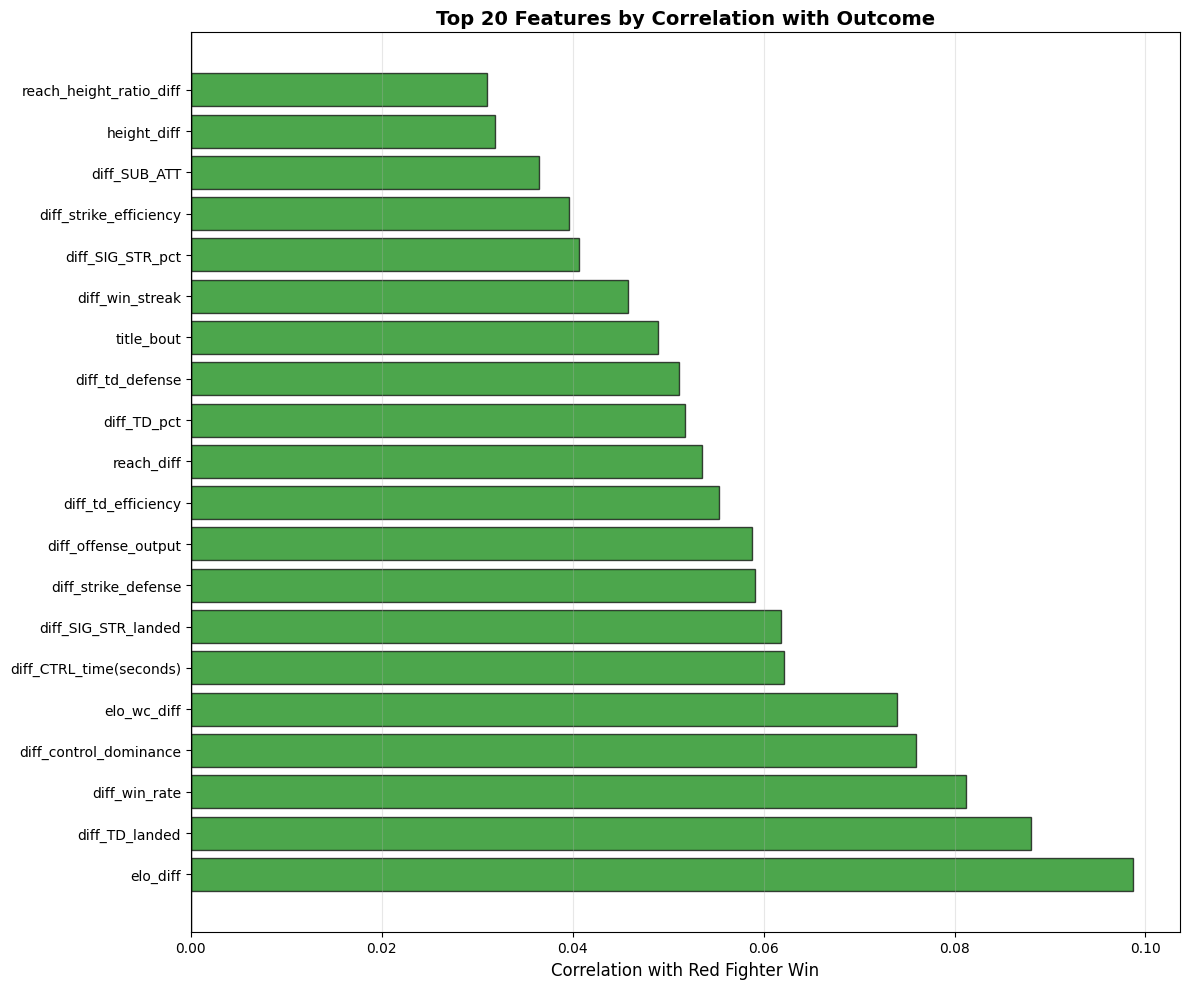


🔝 TOP 10 MOST CORRELATED FEATURES:
elo_diff                   0.098687
diff_TD_landed             0.087986
diff_win_rate              0.081202
diff_control_dominance     0.076002
elo_wc_diff                0.073967
diff_CTRL_time(seconds)    0.062145
diff_SIG_STR_landed        0.061875
diff_strike_defense        0.059117
diff_offense_output        0.058800
diff_td_efficiency         0.055373
dtype: float64

🔻 TOP 10 MOST NEGATIVELY CORRELATED FEATURES:
weight_class_Bantamweight         0.002889
weight_class_WomenBantamweight    0.002203
weight_class_Lightweight          0.001647
weight_class_WomenFlyweight       0.001129
orthodox_vs_southpaw             -0.001574
diff_title_bouts                 -0.007430
weight_class_Middleweight        -0.008653
weight_class_LightHeavyweight    -0.011835
weight_class_Welterweight        -0.012633
diff_wins                        -0.019037
dtype: float64


In [9]:
print("🔍 Analyzing feature correlations with outcome...")

# Calculate correlation with target
feature_correlations = X.corrwith(y).sort_values(ascending=False)

# Plot top correlations
fig, ax = plt.subplots(figsize=(12, 10))

top_n = 20
top_features = feature_correlations.abs().nlargest(top_n)
colors = ['green' if feature_correlations[feat] > 0 else 'red' for feat in top_features.index]

plt.barh(range(top_n), [feature_correlations[feat] for feat in top_features.index], color=colors, alpha=0.7, edgecolor='black')
plt.yticks(range(top_n), top_features.index, fontsize=10)
plt.xlabel('Correlation with Red Fighter Win', fontsize=12)
plt.title(f'Top {top_n} Features by Correlation with Outcome', fontsize=14, fontweight='bold')
plt.axvline(0, color='black', linestyle='-', linewidth=1)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig(f'{VIZ_PATH}/feature_correlations.png', dpi=300, bbox_inches='tight')
print(f"✅ Saved feature correlations to {VIZ_PATH}/feature_correlations.png")
plt.show()

print("\n🔝 TOP 10 MOST CORRELATED FEATURES:")
print(feature_correlations.head(10))

print("\n🔻 TOP 10 MOST NEGATIVELY CORRELATED FEATURES:")
print(feature_correlations.tail(10))

Step 2.10

In [10]:
print("💾 Saving feature-engineered dataset...")

# Combine features with target and important metadata
final_data = pd.concat([
    data[['date', 'R_fighter', 'B_fighter', 'Winner', 'weight_class', 'title_bout']],
    X,
    y
], axis=1)

# Save to CSV
output_path = f'{DATA_PROCESSED}/feature_engineered_data.csv'
final_data.to_csv(output_path, index=False)
print(f"✅ Saved feature-engineered data to {output_path}")
print(f"   Shape: {final_data.shape}")
print(f"   Columns: {len(final_data.columns)}")

# Save feature list for later use
feature_list = {
    'all_features': all_features,
    'feature_categories': {k: [f for f in v if f in data.columns] for k, v in feature_categories.items()},
    'target': 'red_won',
    'total_features': len(all_features)
}

import json
with open(f'{DATA_PROCESSED}/feature_list.json', 'w') as f:
    json.dump(feature_list, f, indent=2)

print(f"✅ Saved feature list to {DATA_PROCESSED}/feature_list.json")

# Display sample of final data
print("\n" + "="*80)
print("SAMPLE OF FEATURE-ENGINEERED DATA:")
print("="*80)
display(final_data[['date', 'R_fighter', 'B_fighter', 'elo_diff', 'elo_wc_diff',
                     'diff_KD', 'diff_SIG_STR_pct', 'red_won']].head(10))

💾 Saving feature-engineered dataset...
✅ Saved feature-engineered data to /content/drive/MyDrive/UFC_ML_Project/data/processed/feature_engineered_data.csv
   Shape: (4768, 46)
   Columns: 46
✅ Saved feature list to /content/drive/MyDrive/UFC_ML_Project/data/processed/feature_list.json

SAMPLE OF FEATURE-ENGINEERED DATA:


,date,R_fighter,B_fighter,elo_diff,elo_wc_diff,diff_KD,diff_SIG_STR_pct,red_won
0,2010-01-02,Jake Ellenberger,Mike Pyle,0.0,0.0,2.000000,0.200000,1
1,2010-01-02,Jim Miller,Duane Ludwig,0.0,0.0,0.000000,-0.468125,1
2,2010-01-02,Martin Kampmann,Jacob Volkmann,0.0,0.0,0.132812,-0.026953,1
3,2010-01-02,Cole Miller,Dan Lauzon,0.0,0.0,0.031250,-0.148125,1
4,2010-01-02,Paul Daley,Dustin Hazelett,0.0,0.0,0.000000,0.002812,1
5,2010-01-02,Rafaello Oliveira,John Gunderson,0.0,0.0,0.000000,0.260000,1
6,2010-01-02,Sam Stout,Joe Lauzon,0.0,0.0,0.468750,-0.282031,1
7,2010-01-02,Mark Munoz,Ryan Jensen,0.0,0.0,0.000000,-0.057500,1
8,2010-01-02,Junior Dos Santos,Gilbert Yvel,0.0,0.0,0.750000,0.542500,1
9,2010-01-02,Rashad Evans,Thiago Silva,0.0,0.0,-0.386719,-0.264004,1


Step 2.11

In [11]:
print("📊 Creating fighter comparison radar charts...")

def create_fighter_comparison(fighter1_data, fighter2_data, fighter1_name, fighter2_name):
    """Create radar chart comparing two fighters"""

    # Select key metrics for comparison
    comparison_metrics = {
        'Strike Accuracy': ('avg_SIG_STR_pct', 0, 100),
        'Takedown %': ('avg_TD_pct', 0, 100),
        'Strike Output': ('avg_SIG_STR_landed', 0, 10),
        'Takedown Output': ('avg_TD_landed', 0, 5),
        'Control Time': ('avg_CTRL_time(seconds)', 0, 300),
        'Sub Attempts': ('avg_SUB_ATT', 0, 3),
        'Knockdowns': ('avg_KD', 0, 2),
        'Win Rate': ('win_rate', 0, 1)
    }

    categories = list(comparison_metrics.keys())

    # Extract values for each fighter
    fighter1_values = []
    fighter2_values = []

    for metric, (col_suffix, min_val, max_val) in comparison_metrics.items():
        # Get values (normalize to 0-1 scale)
        if col_suffix == 'win_rate':
            f1_val = fighter1_data.get(col_suffix, 0)
            f2_val = fighter2_data.get(col_suffix, 0)
        else:
            f1_col = f'R_{col_suffix}' if 'R_' + col_suffix in data.columns else f'B_{col_suffix}'
            f2_col = f'B_{col_suffix}' if 'B_' + col_suffix in data.columns else f'R_{col_suffix}'

            f1_val = fighter1_data.get(col_suffix, 0)
            f2_val = fighter2_data.get(col_suffix, 0)

        # Normalize to 0-100 scale
        f1_normalized = ((f1_val - min_val) / (max_val - min_val)) * 100 if max_val > min_val else 50
        f2_normalized = ((f2_val - min_val) / (max_val - min_val)) * 100 if max_val > min_val else 50

        fighter1_values.append(max(0, min(100, f1_normalized)))
        fighter2_values.append(max(0, min(100, f2_normalized)))

    # Close the radar chart
    fighter1_values += fighter1_values[:1]
    fighter2_values += fighter2_values[:1]
    categories += categories[:1]

    # Create the plot
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=fighter1_values,
        theta=categories,
        fill='toself',
        name=fighter1_name,
        line=dict(color='red', width=2)
    ))

    fig.add_trace(go.Scatterpolar(
        r=fighter2_values,
        theta=categories,
        fill='toself',
        name=fighter2_name,
        line=dict(color='blue', width=2)
    ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100]
            )),
        showlegend=True,
        title=f"Fighter Comparison: {fighter1_name} vs {fighter2_name}",
        height=600,
        width=800
    )

    return fig

# Example: Create comparison for a recent fight
recent_fight = data.iloc[-1]

# Prepare fighter data (you would fetch this from your dataset in practice)
fighter1_name = recent_fight['R_fighter']
fighter2_name = recent_fight['B_fighter']

fighter1_data = {
    'avg_SIG_STR_pct': recent_fight['R_avg_SIG_STR_pct'],
    'avg_TD_pct': recent_fight['R_avg_TD_pct'],
    'avg_SIG_STR_landed': recent_fight['R_avg_SIG_STR_landed'],
    'avg_TD_landed': recent_fight['R_avg_TD_landed'],
    'avg_CTRL_time(seconds)': recent_fight['R_avg_CTRL_time(seconds)'],
    'avg_SUB_ATT': recent_fight['R_avg_SUB_ATT'],
    'avg_KD': recent_fight['R_avg_KD'],
    'win_rate': recent_fight['R_win_rate']
}

fighter2_data = {
    'avg_SIG_STR_pct': recent_fight['B_avg_SIG_STR_pct'],
    'avg_TD_pct': recent_fight['B_avg_TD_pct'],
    'avg_SIG_STR_landed': recent_fight['B_avg_SIG_STR_landed'],
    'avg_TD_landed': recent_fight['B_avg_TD_landed'],
    'avg_CTRL_time(seconds)': recent_fight['B_avg_CTRL_time(seconds)'],
    'avg_SUB_ATT': recent_fight['B_avg_SUB_ATT'],
    'avg_KD': recent_fight['B_avg_KD'],
    'win_rate': recent_fight['B_win_rate']
}

fig = create_fighter_comparison(fighter1_data, fighter2_data, fighter1_name, fighter2_name)
# Save with fallback
fig.write_html(f'{VIZ_PATH}/fighter_comparison_example.html')
try:
    fig.write_image(f'{VIZ_PATH}/fighter_comparison_example.png', width=1000, height=800)
    print(f"✅ Saved fighter comparison to {VIZ_PATH}/fighter_comparison_example.png")
except (ValueError, ImportError):
    print(f"✅ Saved fighter comparison to {VIZ_PATH}/fighter_comparison_example.html")
fig.show()

📊 Creating fighter comparison radar charts...
✅ Saved fighter comparison to /content/drive/MyDrive/UFC_ML_Project/visualizations/fighter_comparison_example.html


Diagnostic

In [12]:
print("🔍 ELO System Health Check:")
print("="*80)

# 1. Check ELO spread
all_elos = data['R_elo_after'].dropna().tolist() + data['B_elo_after'].dropna().tolist()
unique_elos = list(set(all_elos))

print(f"\n1️⃣ ELO Rating Statistics:")
print(f"   Unique ELO values: {len(unique_elos)}")
print(f"   Min: {min(unique_elos):.0f}")
print(f"   Max: {max(unique_elos):.0f}")
print(f"   Spread: {max(unique_elos) - min(unique_elos):.0f}")
print(f"   Mean: {np.mean(unique_elos):.0f}")
print(f"   Std Dev: {np.std(unique_elos):.0f}")

# 2. Check ELO difference distribution
print(f"\n2️⃣ ELO Difference Statistics:")
print(f"   Mean: {data['elo_diff'].mean():.2f}")
print(f"   Std Dev: {data['elo_diff'].std():.2f}")
print(f"   Min: {data['elo_diff'].min():.2f}")
print(f"   Max: {data['elo_diff'].max():.2f}")

# 3. Win rate by ELO difference
print(f"\n3️⃣ Win Rate by ELO Advantage:")
data['elo_bins'] = pd.cut(data['elo_diff'], bins=[-1000, -100, -50, 0, 50, 100, 1000])
win_rate_by_elo = data.groupby('elo_bins')['red_won'].mean()
print(win_rate_by_elo)

# 4. Check if ELO predicts better than 50%
print(f"\n4️⃣ Prediction Power:")
# When red has higher ELO, how often do they win?
red_favored = data[data['elo_diff'] > 0]
red_underdog = data[data['elo_diff'] < 0]
print(f"   When Red has higher ELO: {red_favored['red_won'].mean()*100:.1f}% win rate (n={len(red_favored)})")
print(f"   When Blue has higher ELO: {red_underdog['red_won'].mean()*100:.1f}% win rate (n={len(red_underdog)})")

# 5. Check temporal bias
print(f"\n5️⃣ Temporal Analysis:")
data['year'] = pd.to_datetime(data['date']).dt.year
recent_fights = data[data['year'] >= 2018]
older_fights = data[data['year'] < 2018]
print(f"   Recent fights (2018+): {len(recent_fights)}")
print(f"   Older fights (<2018): {len(older_fights)}")
print(f"   Red win rate (recent): {recent_fights['red_won'].mean()*100:.1f}%")
print(f"   Red win rate (older): {older_fights['red_won'].mean()*100:.1f}%")

# 6. Check class balance
print(f"\n6️⃣ Class Balance:")
print(f"   Red wins: {data['red_won'].sum()} ({data['red_won'].mean()*100:.1f}%)")
print(f"   Blue wins: {len(data) - data['red_won'].sum()} ({(1-data['red_won'].mean())*100:.1f}%)")

print("\n" + "="*80)
print("🎯 EVALUATION:")
elo_spread = max(unique_elos) - min(unique_elos)
elo_std = np.std(unique_elos)

if elo_spread < 200:
    print("❌ ELO spread too narrow - System not working properly")
elif elo_spread < 400:
    print("⚠️  ELO spread marginal - Could be better")
else:
    print("✅ ELO spread looks good")

if elo_std < 50:
    print("❌ ELO std dev too low - Poor discrimination")
elif elo_std < 80:
    print("⚠️  ELO std dev okay - Could be better")
else:
    print("✅ ELO std dev looks good")

favored_win_rate = red_favored['red_won'].mean()
if favored_win_rate < 0.55:
    print("❌ ELO barely predicts outcomes - Not useful")
elif favored_win_rate < 0.60:
    print("⚠️  ELO has weak predictive power - Marginal")
else:
    print("✅ ELO has good predictive power")


🔍 ELO System Health Check:

1️⃣ ELO Rating Statistics:
   Unique ELO values: 7910
   Min: 1411
   Max: 1700
   Spread: 288
   Mean: 1524
   Std Dev: 41

2️⃣ ELO Difference Statistics:
   Mean: 8.24
   Std Dev: 32.69
   Min: -142.54
   Max: 172.91

3️⃣ Win Rate by ELO Advantage:
elo_bins
(-1000, -100]    0.222222
(-100, -50]      0.440678
(-50, 0]         0.556136
(0, 50]          0.589416
(50, 100]        0.651685
(100, 1000]      0.766667
Name: red_won, dtype: float64

4️⃣ Prediction Power:
   When Red has higher ELO: 60.2% win rate (n=2667)
   When Blue has higher ELO: 52.3% win rate (n=1646)

5️⃣ Temporal Analysis:
   Recent fights (2018+): 1562
   Older fights (<2018): 3206
   Red win rate (recent): 56.3%
   Red win rate (older): 58.4%

6️⃣ Class Balance:
   Red wins: 2750 (57.7%)
   Blue wins: 2018 (42.3%)

🎯 EVALUATION:
⚠️  ELO spread marginal - Could be better
❌ ELO std dev too low - Poor discrimination
✅ ELO has good predictive power


/tmp/ipython-input-1784320729.py:26: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

